In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py

In [2]:
df = pd.read_csv(r'F:\New folder/Walmart.csv')
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
df.shape

(6435, 8)

In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

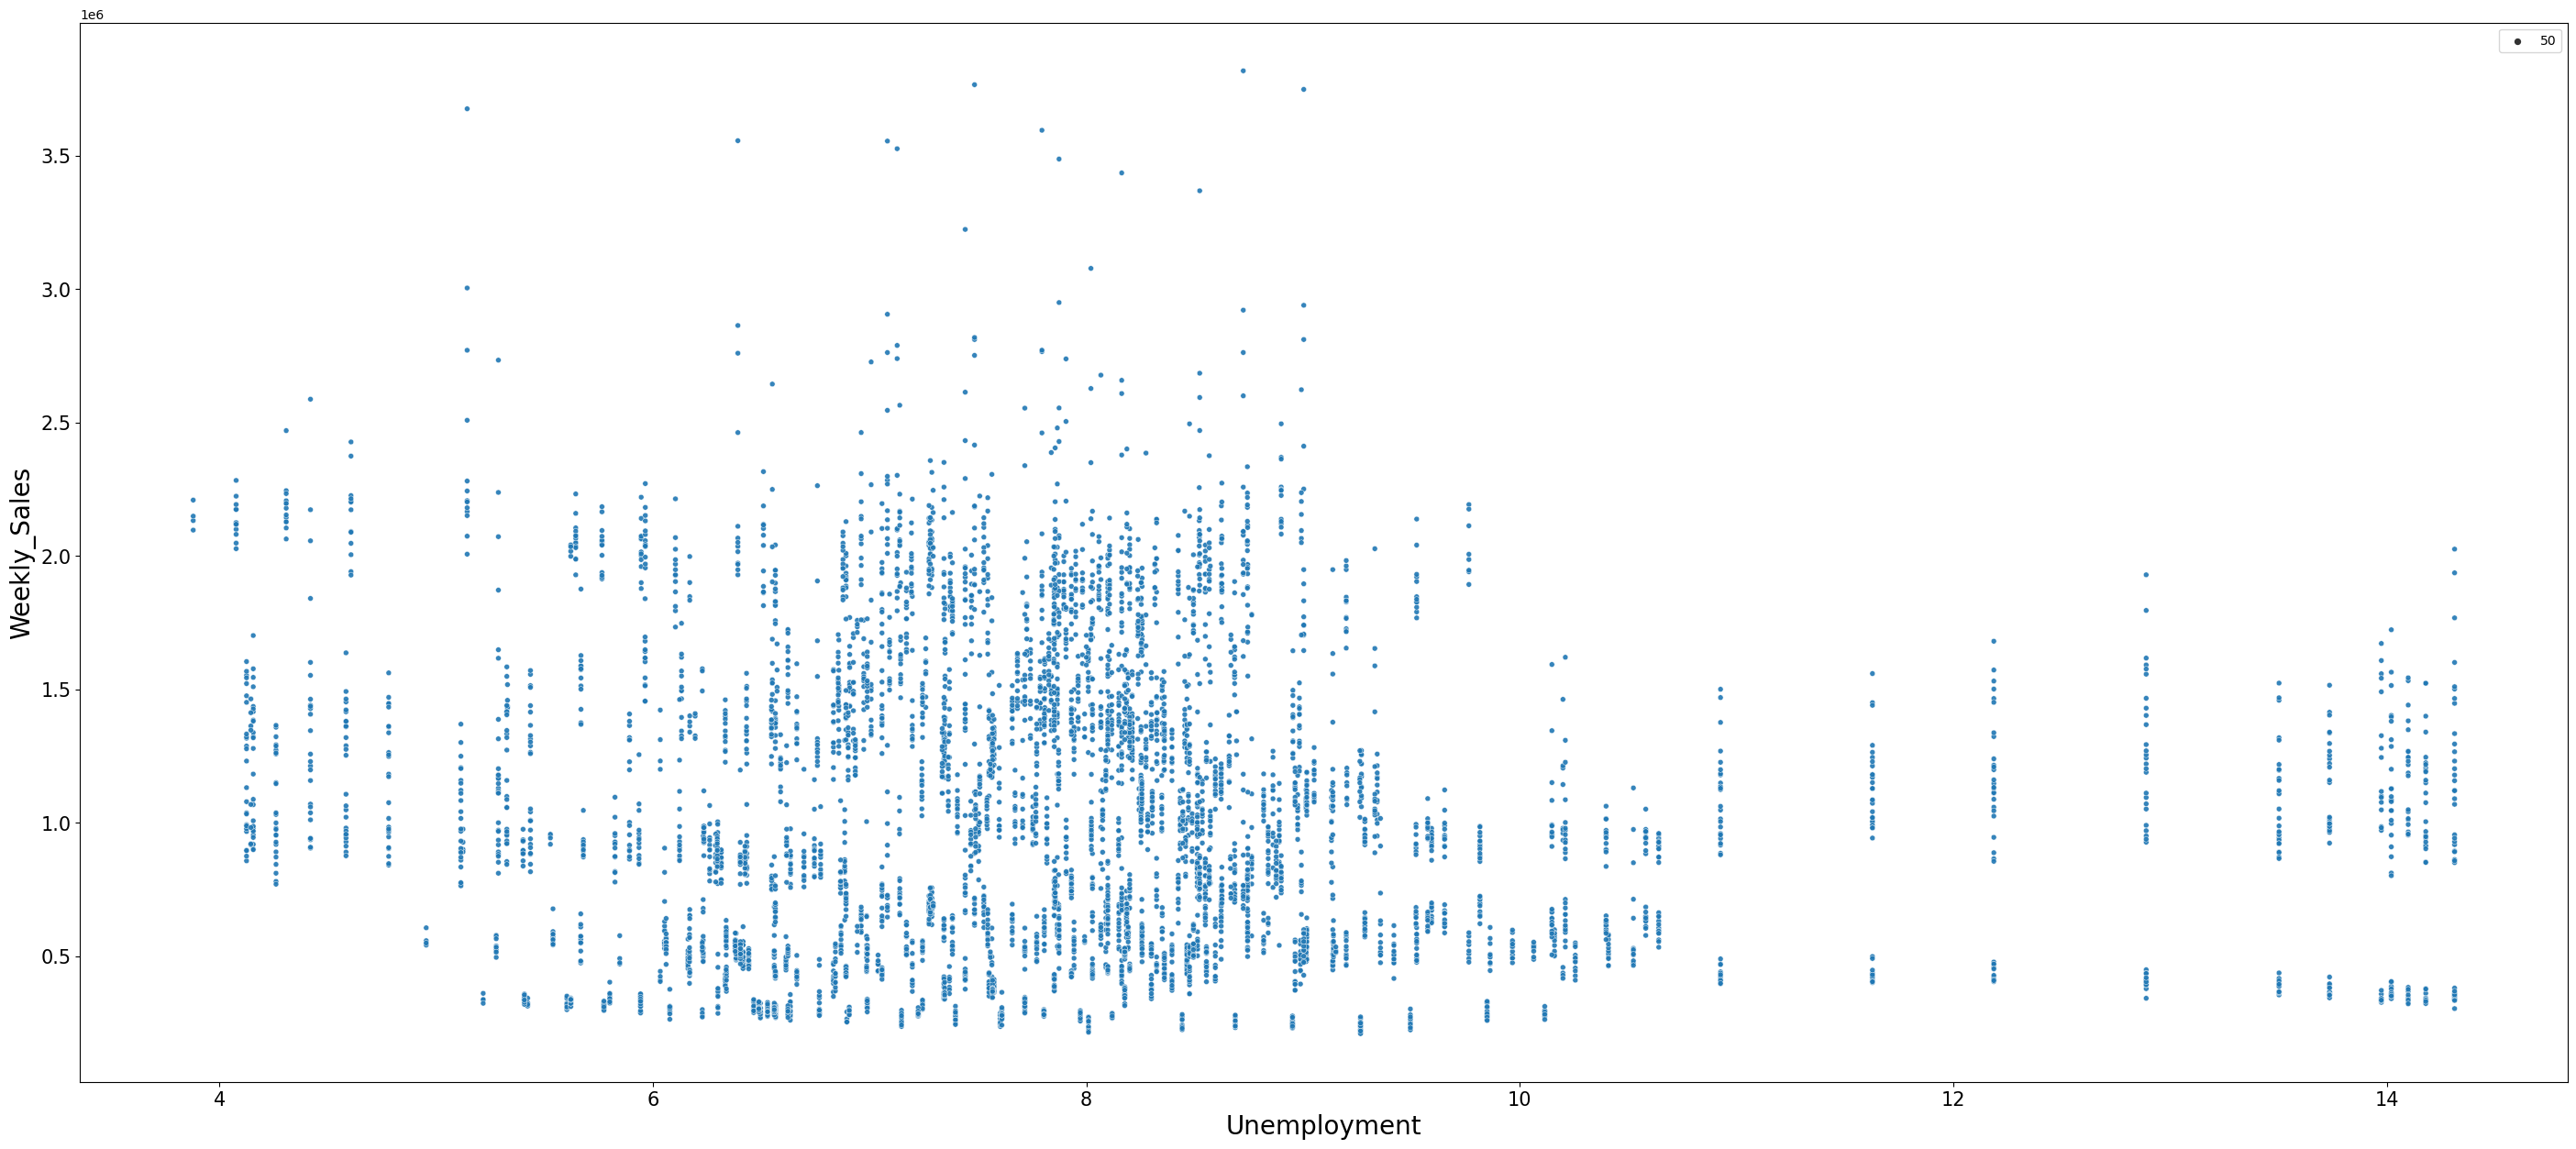

In [7]:
plt.figure(figsize=(35,15))
sns.scatterplot(x = 'Unemployment',y = 'Weekly_Sales',alpha=0.9,size = 50,data = df)
plt.xlabel('Unemployment',fontsize = 20)
plt.ylabel('Weekly_Sales',fontsize = 20)
plt.xticks(rotation = 0,fontsize = 15)
plt.yticks(rotation = 0,fontsize = 15)
plt.show()

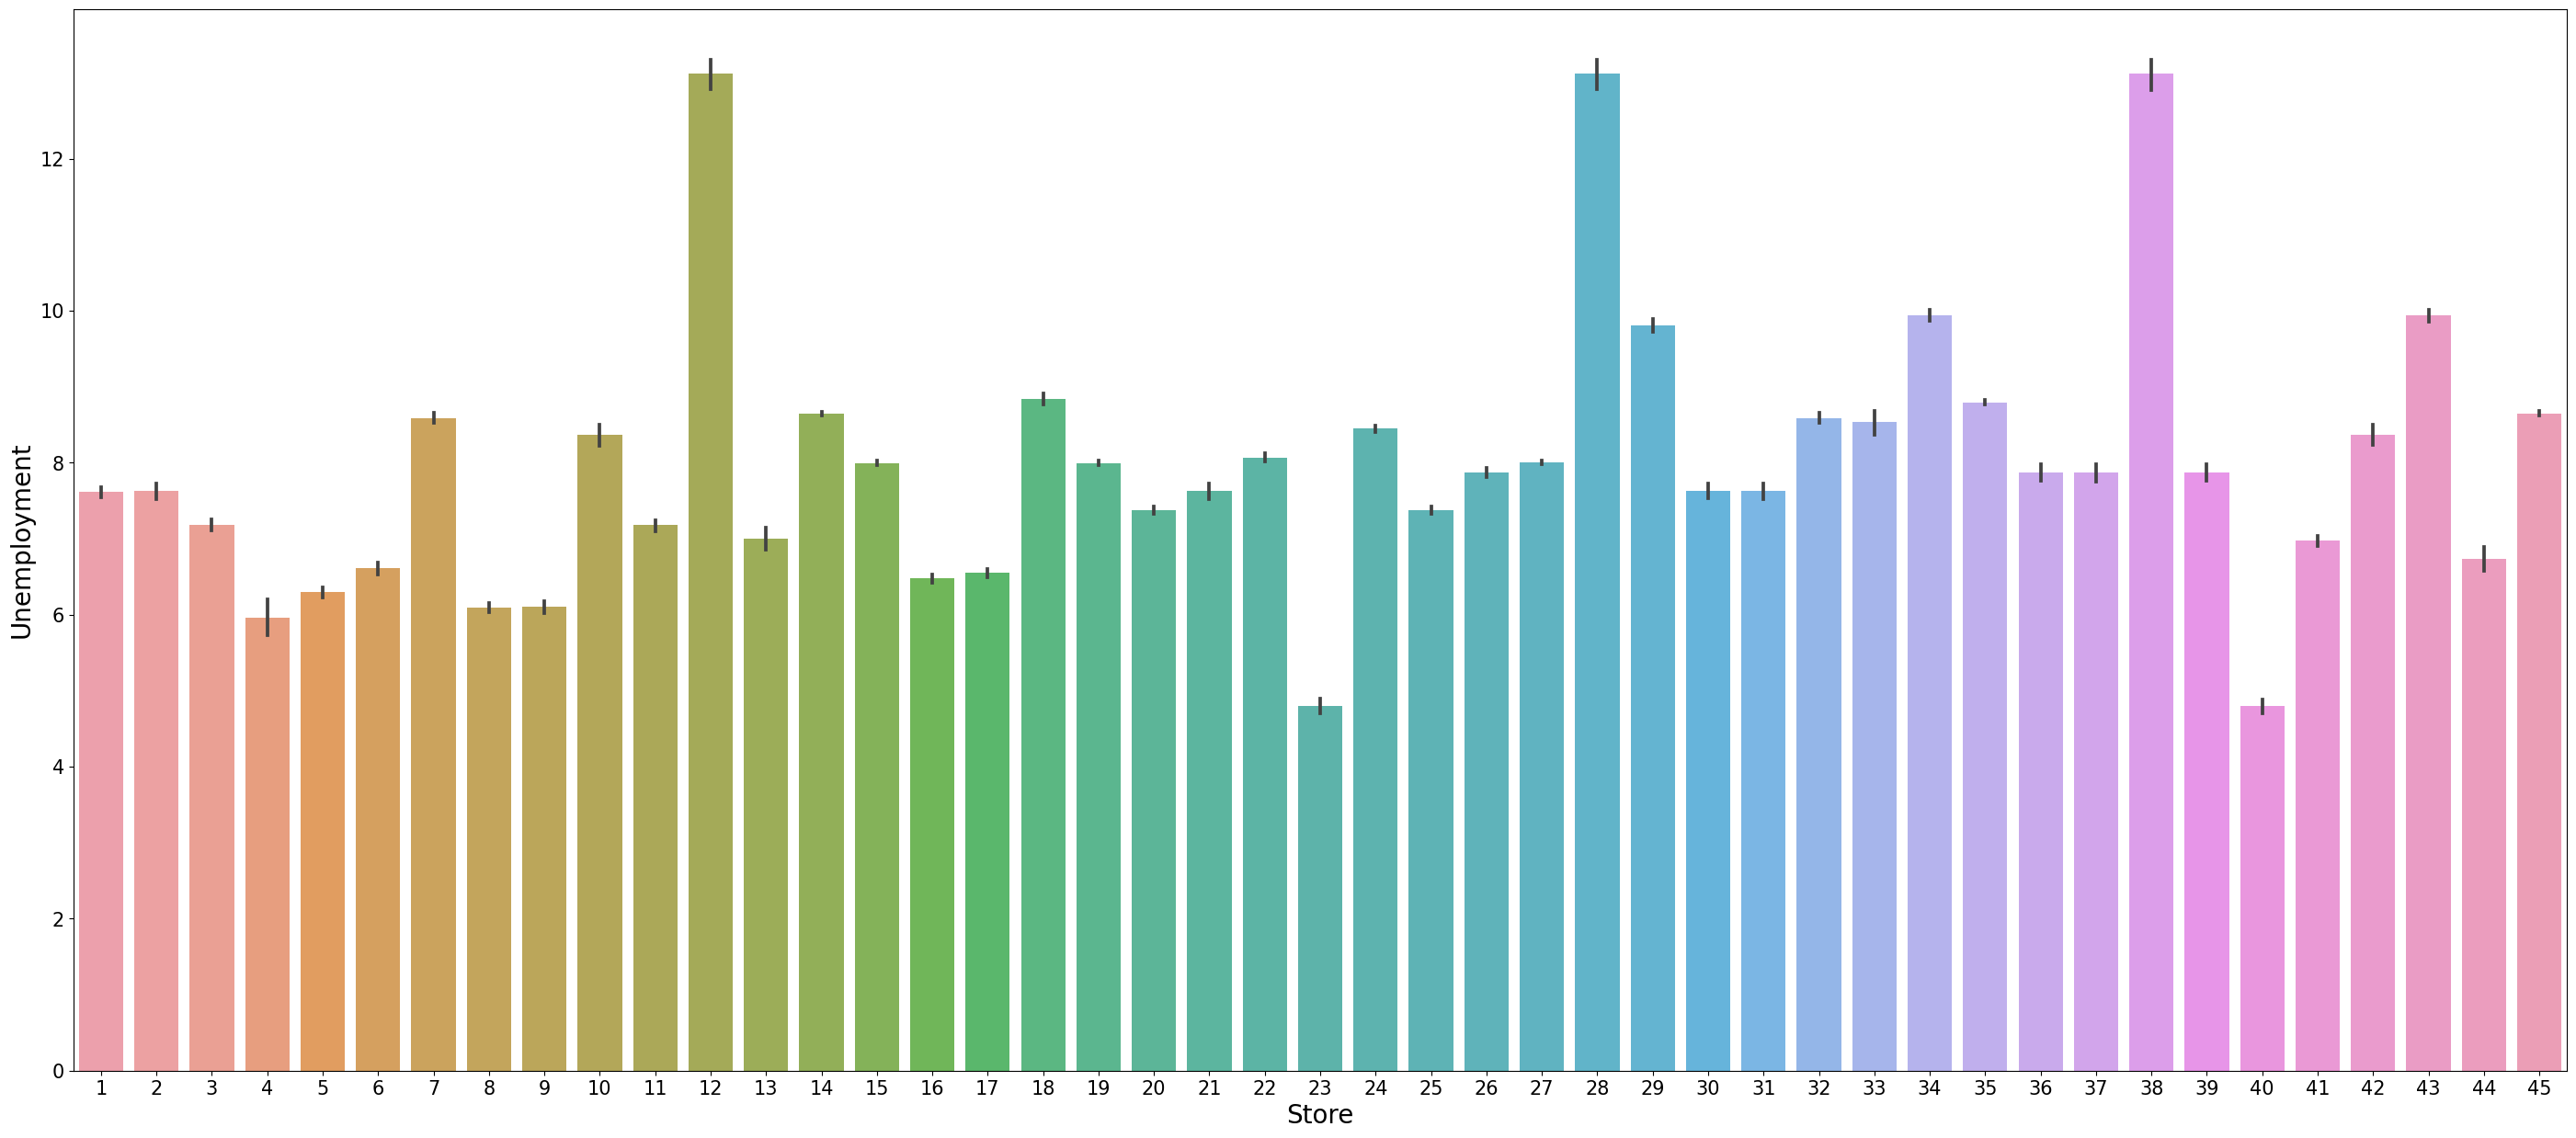

In [8]:
plt.figure(figsize=(35,15))
sns.barplot(x = 'Store',y = 'Unemployment',alpha=0.9,data = df)
plt.xlabel('Store',fontsize = 20)
plt.ylabel('Unemployment',fontsize = 20)
plt.xticks(rotation = 0,fontsize = 15)
plt.yticks(rotation = 0,fontsize = 15)
plt.show()

In [9]:
# Yes weekly sales are affected by the unemployment rate there seems to be a visible decrease in sales when the unemployment index is higher than 10.
#  stores are suffering - 12,28,38

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [10]:
df2=df.groupby('Date')[['Weekly_Sales']].sum()
df2

Weekly_Sales
Date                    
01-04-2011   43458991.19
01-06-2012   48281649.72
01-07-2011   47578519.50
01-10-2010   42239875.87
02-03-2012   46861034.97
...                  ...
30-07-2010   44630363.42
30-09-2011   42195830.81
30-12-2011   46042461.04
31-08-2012   47159639.43
31-12-2010   40432519.00

[143 rows x 1 columns]

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

<Figure size 4500x1500 with 0 Axes>

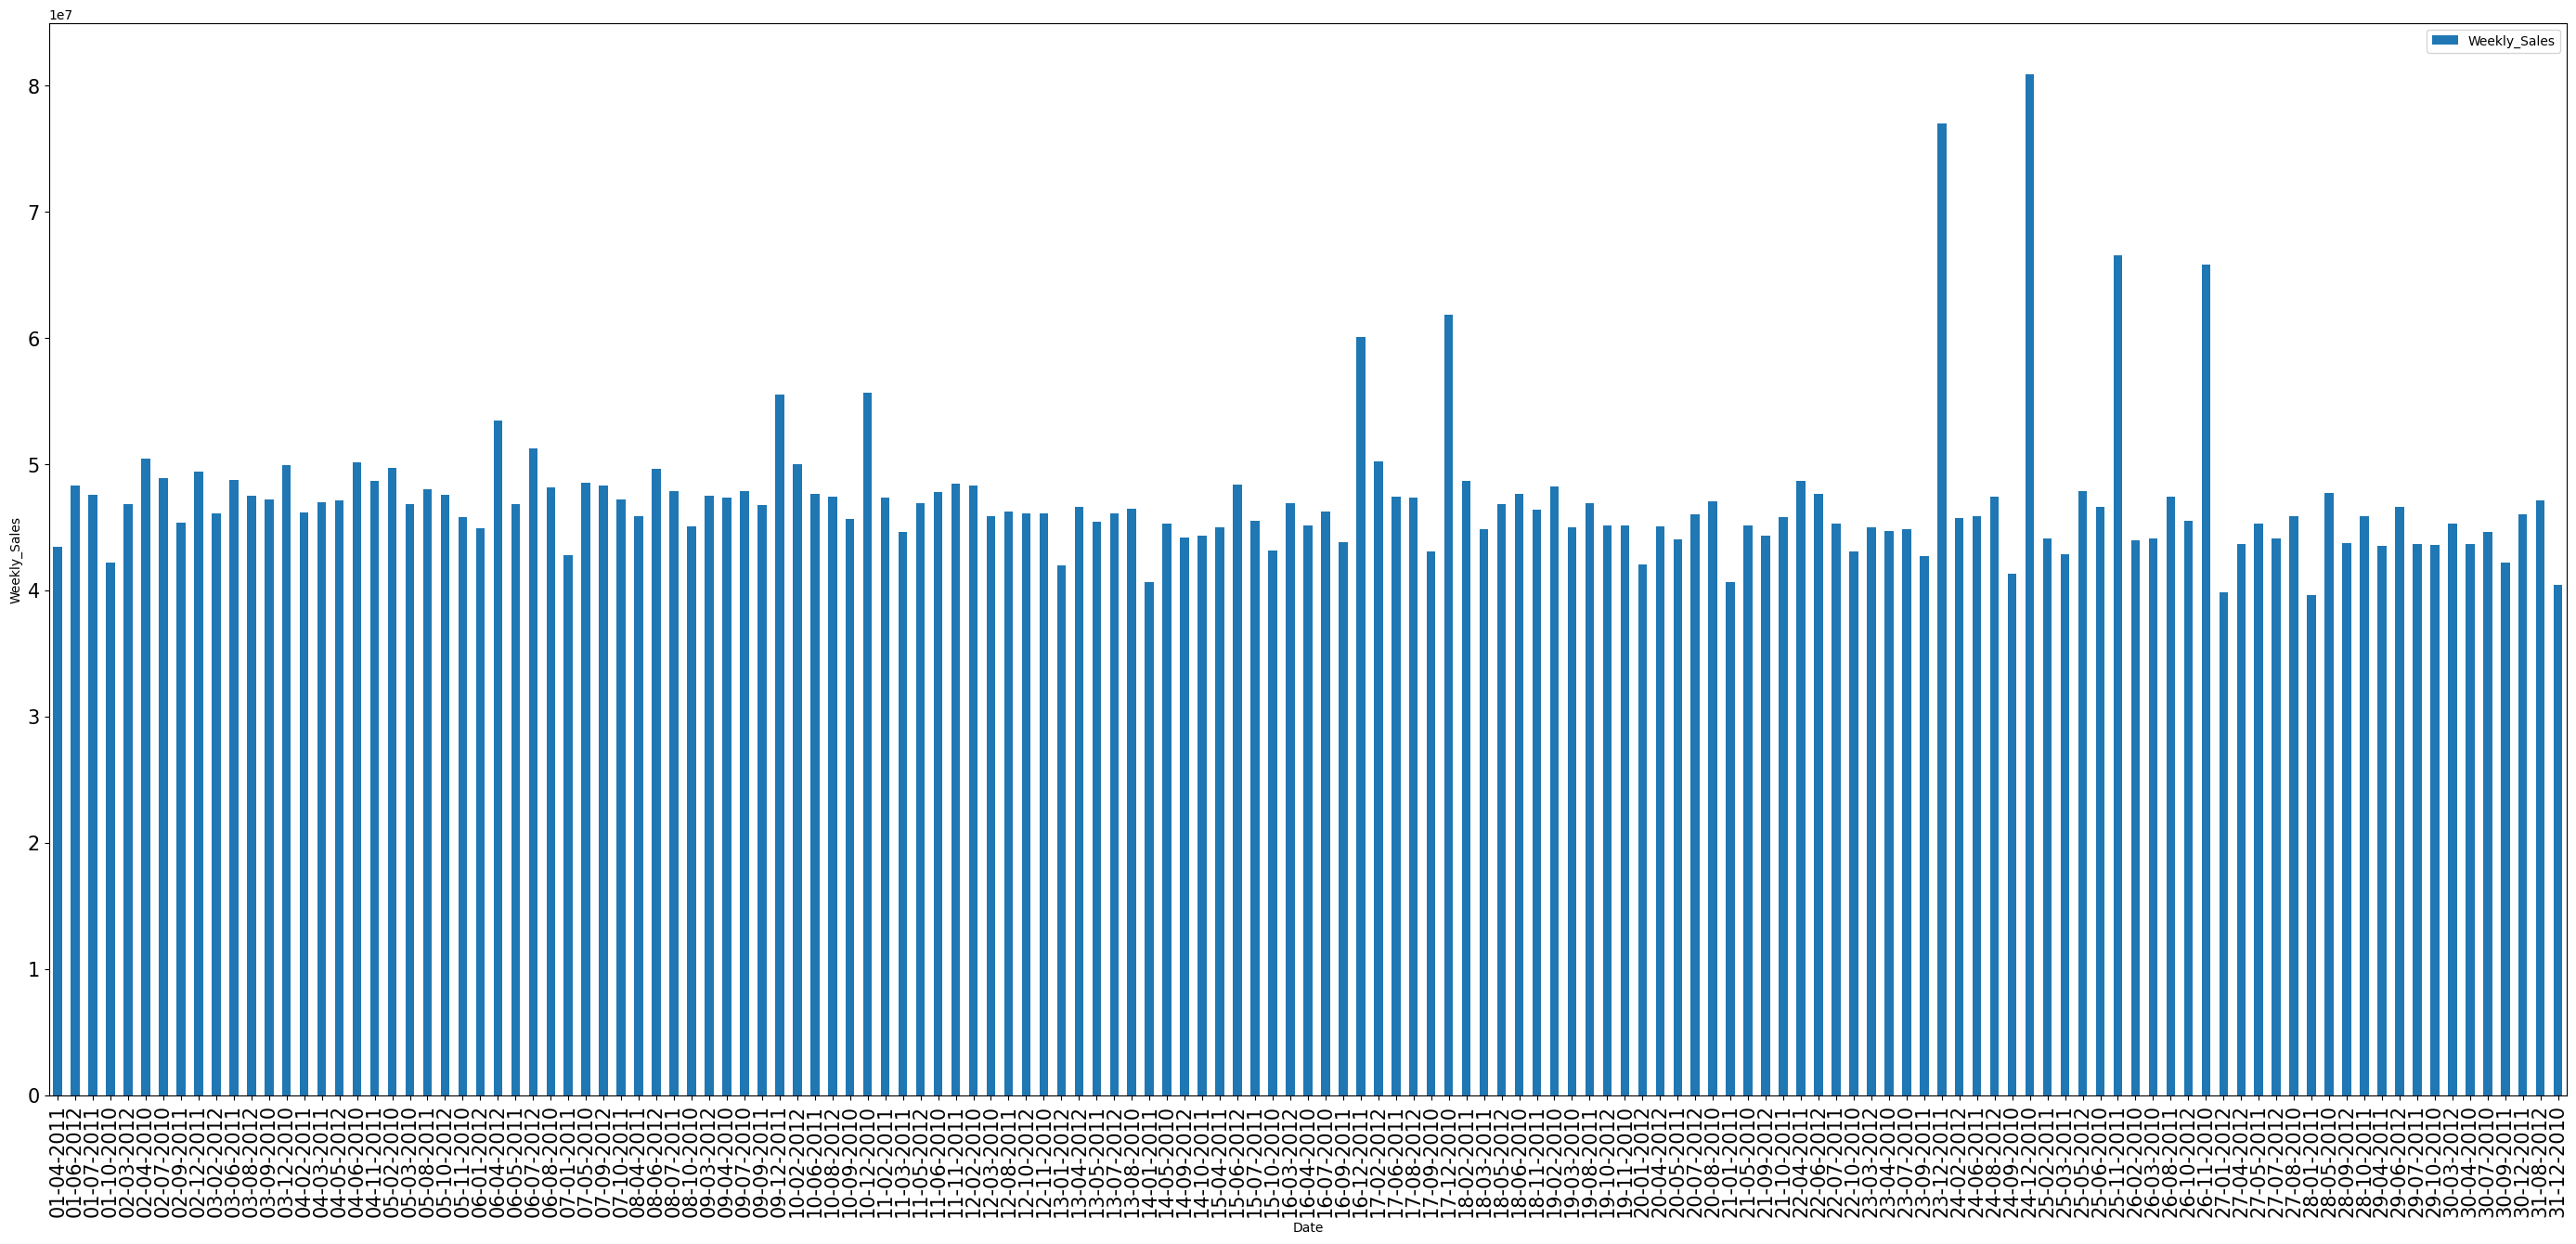

In [11]:
plt.figure(figsize=(45,15))
df2.plot(kind = 'bar',figsize=(35,15),fontsize = 15,xlabel = 'Date',ylabel = 'Weekly_Sales')

In [12]:
# weekly sales show a seasonal trend the reason is winter season sales is high

# c. Does temperature affect the weekly sales in any manner?

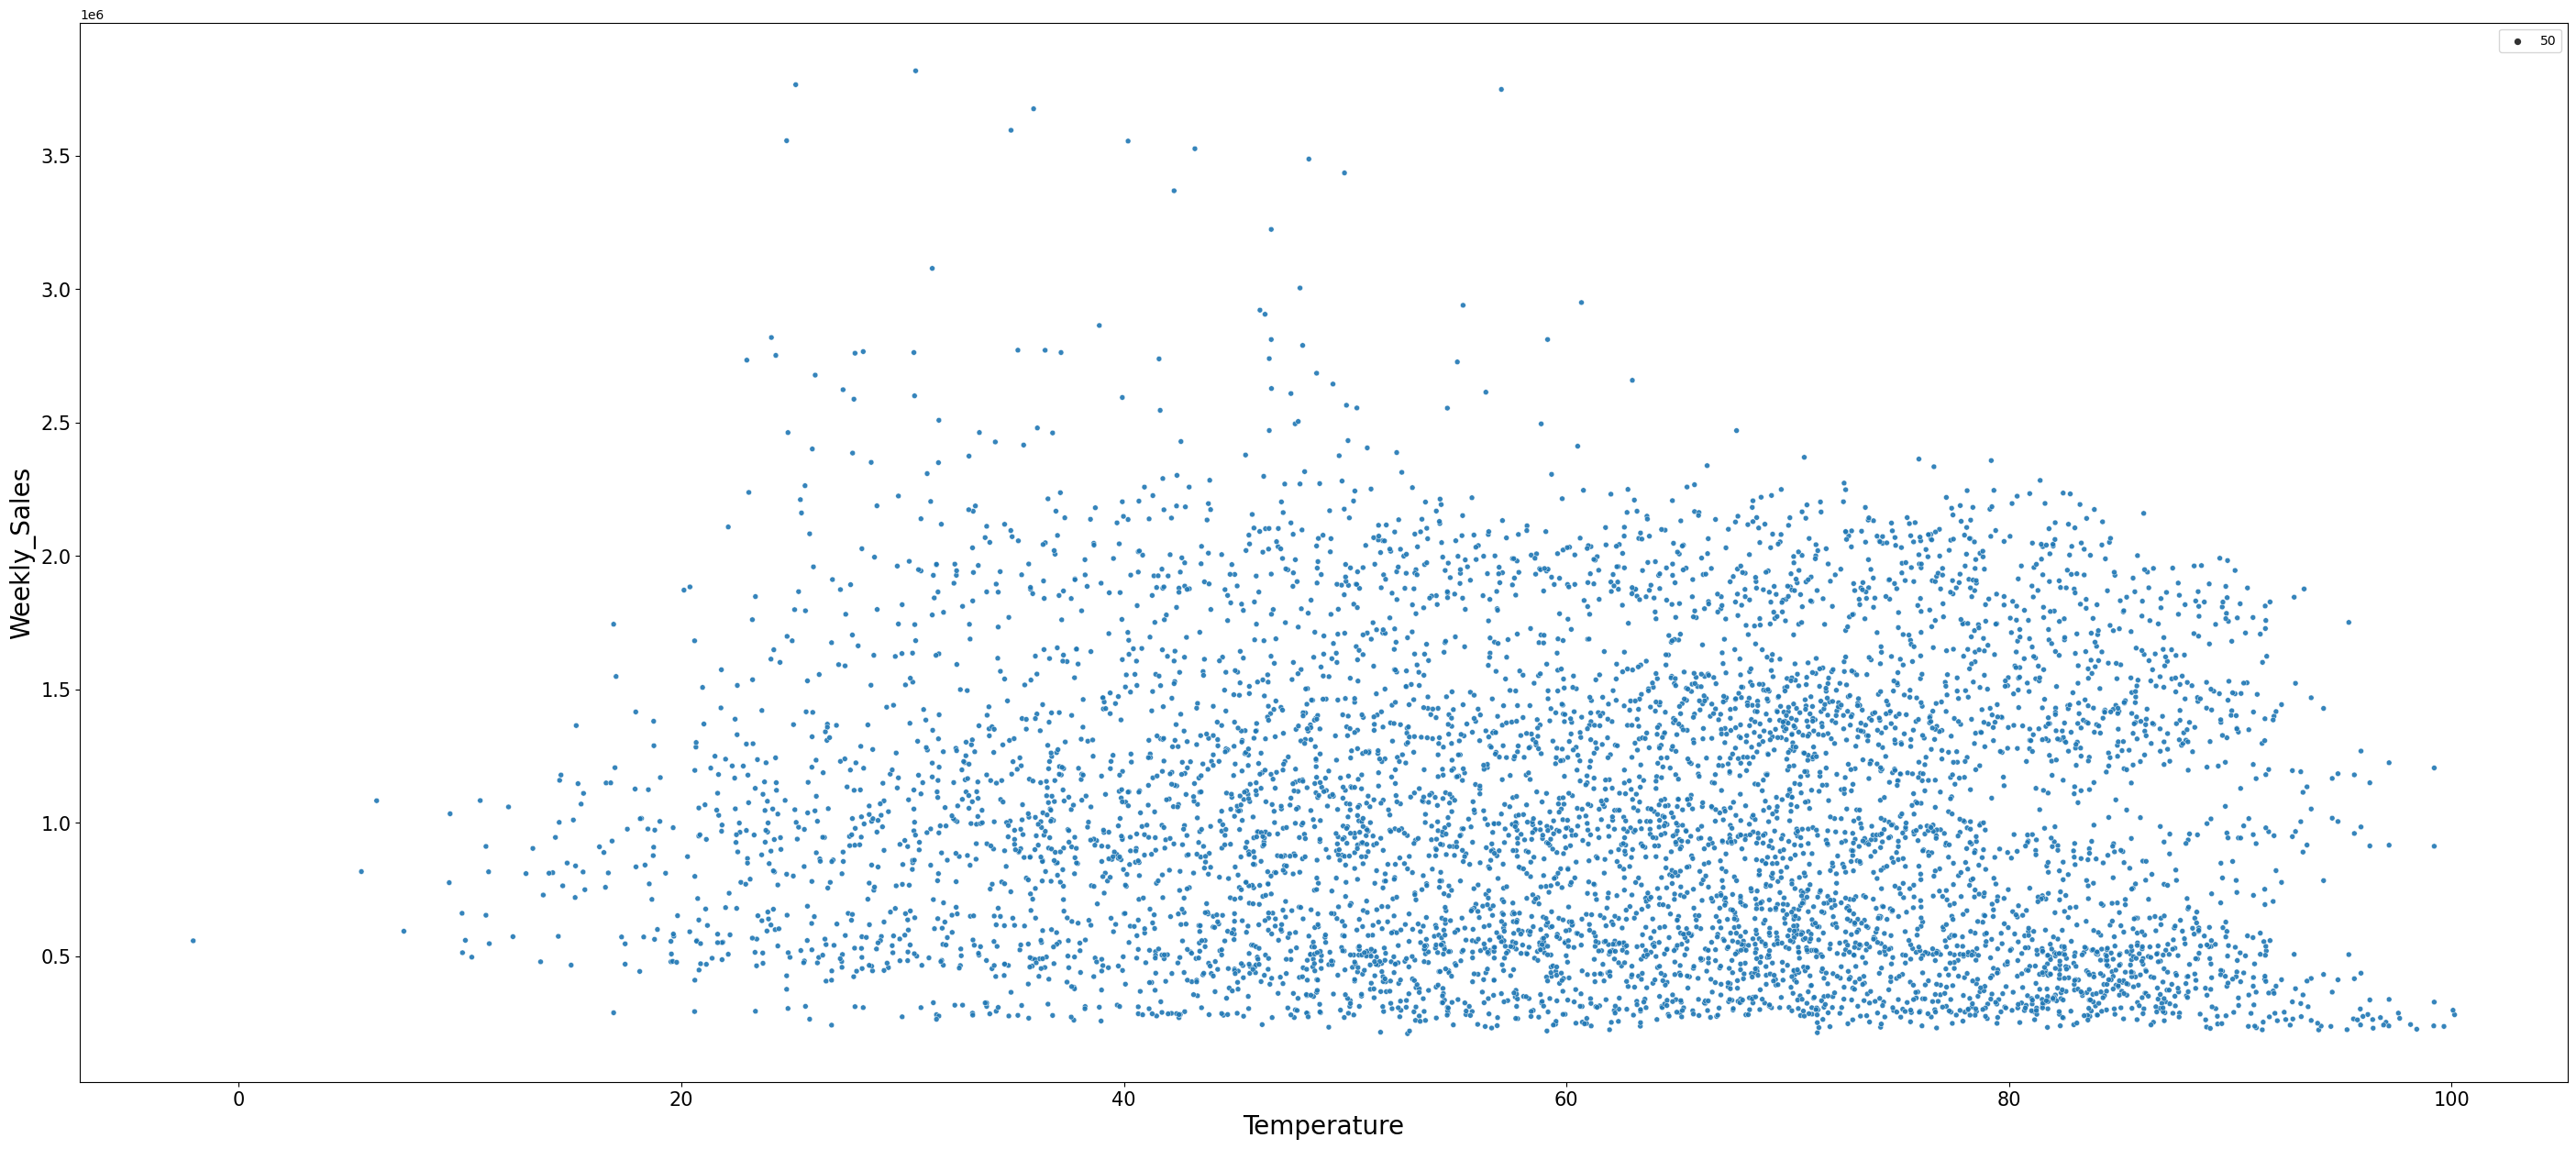

In [13]:
plt.figure(figsize=(35,15))
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',alpha=0.9,size = 50,data = df)
plt.xlabel('Temperature',fontsize = 20)
plt.ylabel('Weekly_Sales',fontsize = 20)
plt.xticks(rotation = 0,fontsize = 15)
plt.yticks(rotation = 0,fontsize = 15)
plt.show()

In [14]:
# the highest sales occur for most store types between the range of40 to 80 degrees Fahrenheit, thus proving the idea that pleasant weather encourages
# higher sales. Sales are relatively lower for very low and very high temperatures butseem to be adequately high for favorable climate conditions.

# d. How is the Consumer Price index affecting the weekly sales of various stores?

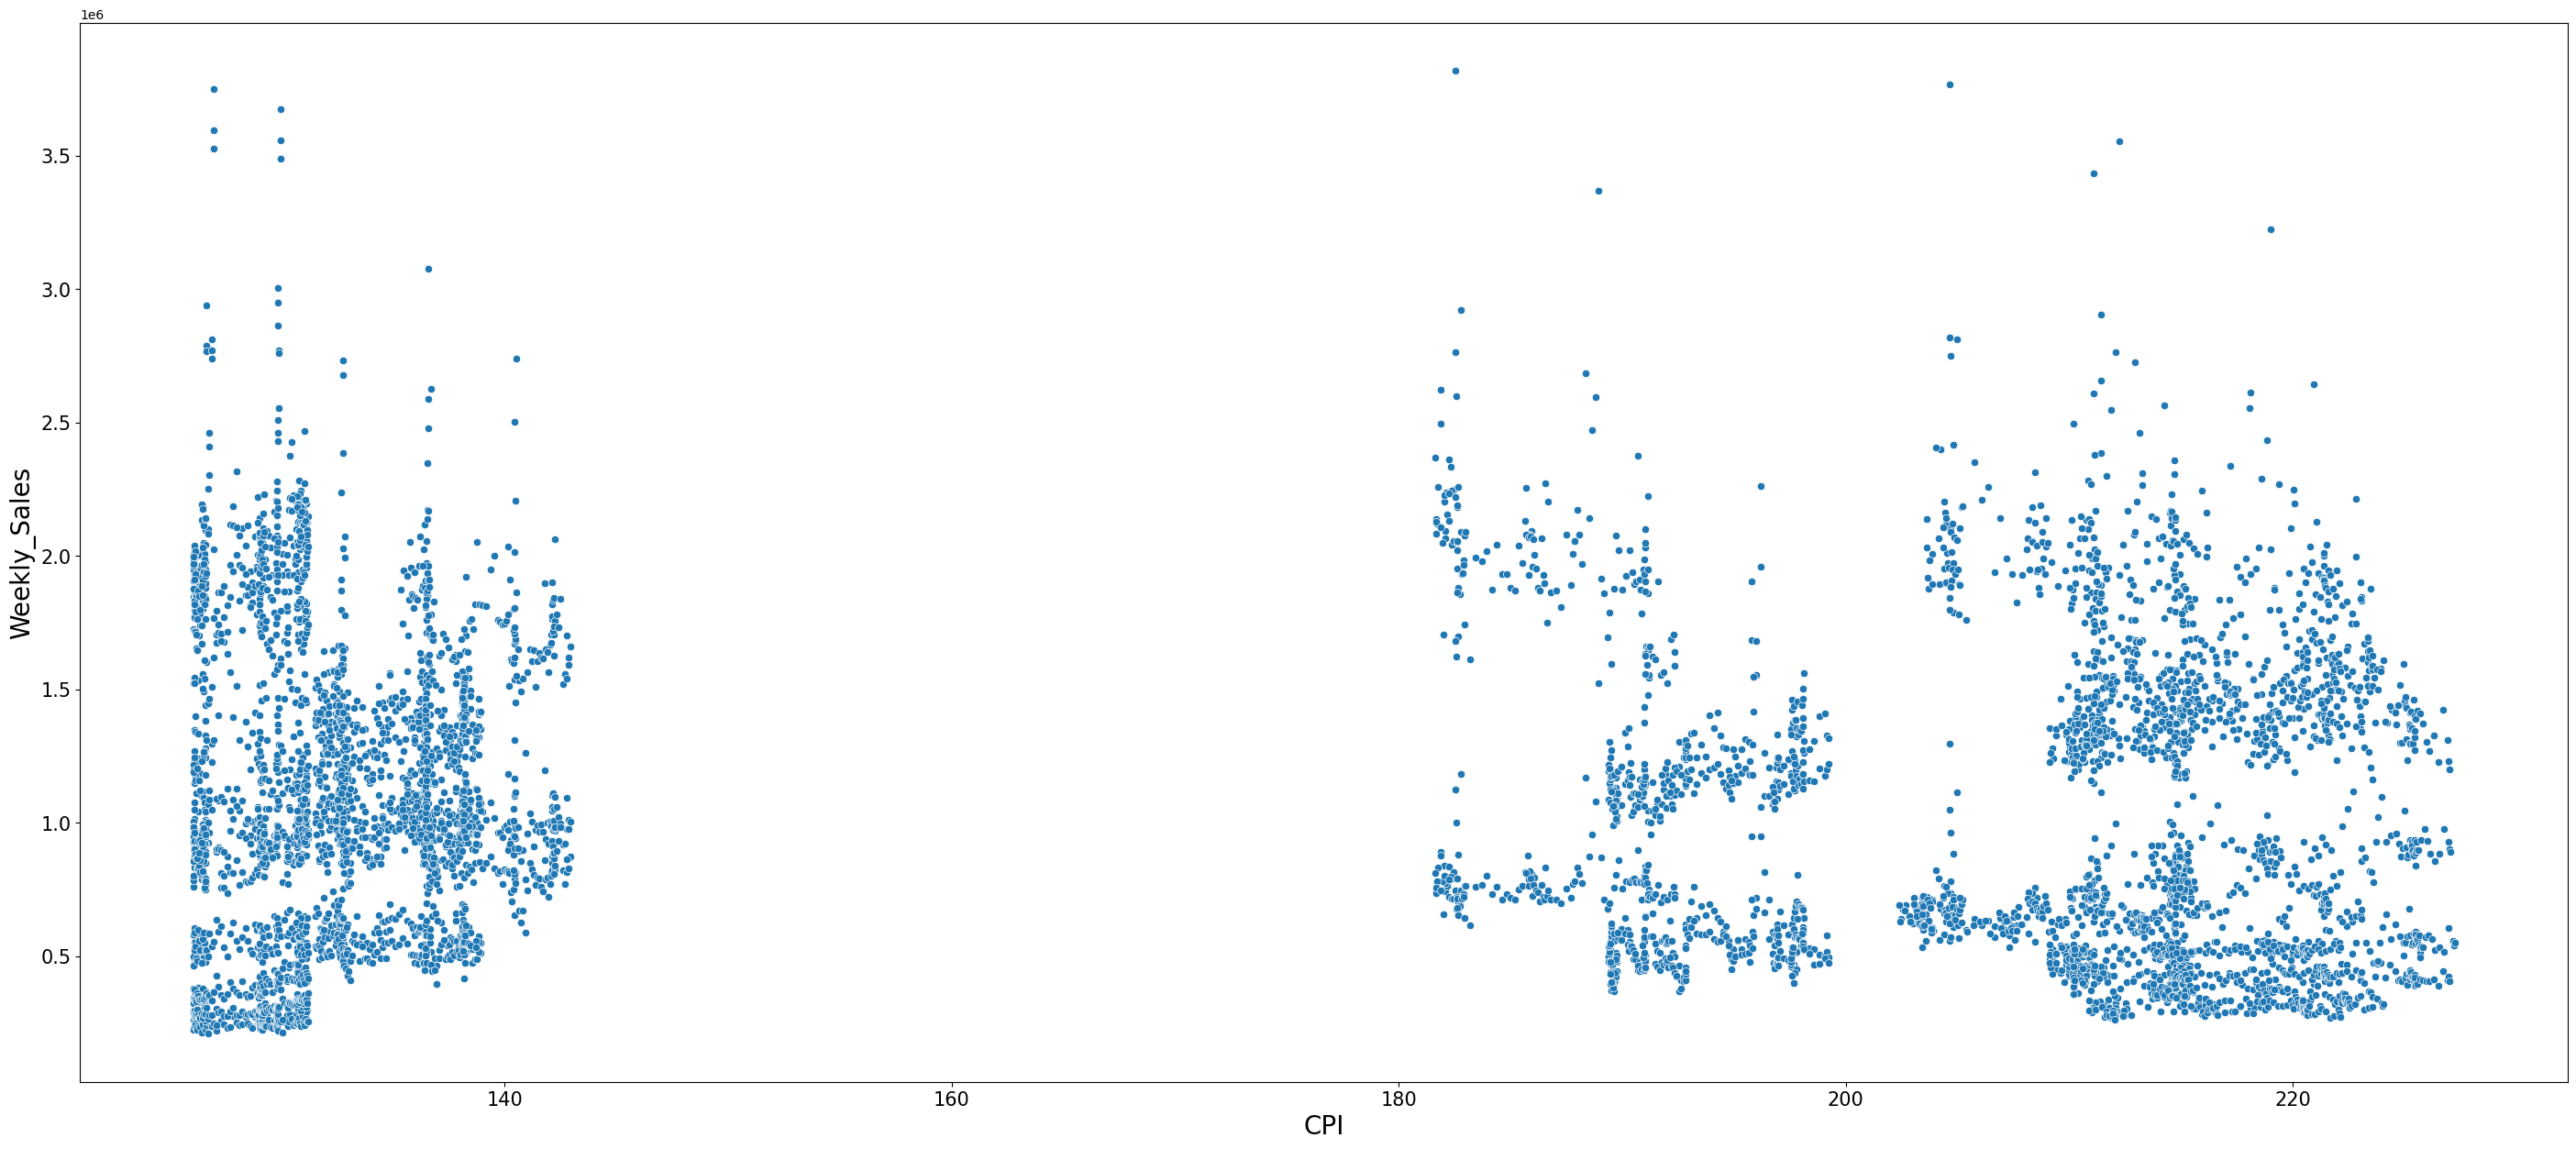

In [15]:
plt.figure(figsize=(35,15))
sns.scatterplot(x = 'CPI',y = 'Weekly_Sales',data = df)
plt.xlabel('CPI',fontsize = 20)
plt.ylabel('Weekly_Sales',fontsize = 20)
plt.xticks(rotation = 0,fontsize = 15)
plt.yticks(rotation = 0,fontsize = 15)
plt.show()

In [16]:
# There seems to be no visible relationship between the change in CPI and weekly sales for Walmart stores (sales still occur at high CPI rates in some store).

# D). Top performing stores are 20,4,14,13,2,10,27,6,1

In [17]:
df3 = df.groupby('Store')['Weekly_Sales'].sum()
df4_sort = df3.sort_values(ascending = False)

df4_sort.head(10)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

In [18]:
df3 = df.groupby('Store')['Weekly_Sales'].sum()
df3
df5_sort = df3.sort_values(ascending = True)
df5_sort.head(10)

Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
3     57586735.07
30    62716885.12
37    74202740.32
16    74252425.40
29    77141554.31
Name: Weekly_Sales, dtype: float64

In [19]:
# worst performing store are 33,44,5,36,38,3,30,37,16,29

In [20]:
store20 = df[df['Store'] == 20]
store20 = store20[['Date','Weekly_Sales']]
store20 = store20.groupby('Date').sum()
store20.reset_index(inplace = True)

store20['Date'] = pd.to_datetime(store20['Date']) #converting 'date' column to a datetime type
store20.columns=['ds','y'] #Rename columns
store20

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\2720596881.py:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



ds           y
0   2011-01-04  1927993.09
1   2012-01-06  2143126.59
2   2011-01-07  2053165.41
3   2010-01-10  1933719.21
4   2012-02-03  2148822.76
..         ...         ...
138 2010-07-30  1955896.59
139 2011-09-30  1945808.26
140 2011-12-30  2043245.00
141 2012-08-31  2062481.56
142 2010-12-31  1799737.79

[143 rows x 2 columns]

In [21]:
y_train = store20.iloc[:120]
y_test = store20.iloc[120:]

In [22]:
model = Prophet()
model.fit(y_train)

19:13:53 - cmdstanpy - INFO - Chain [1] start processing
19:13:54 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = model.make_future_dataframe(periods=52, freq='W-Fri')
forecast = model.predict(future)
fig=plot_plotly(model, forecast)
py.iplot(fig)

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', "trend"]]

ds          yhat    yhat_lower    yhat_upper         trend
0   2010-01-10  1.998697e+06  1.770686e+06  2.226559e+06  2.124031e+06
1   2010-02-04  2.275959e+06  2.043122e+06  2.501604e+06  2.126302e+06
2   2010-02-07  2.387559e+06  2.145373e+06  2.620770e+06  2.126575e+06
3   2010-02-19  2.076519e+06  1.843823e+06  2.306946e+06  2.127665e+06
4   2010-02-26  2.004591e+06  1.765274e+06  2.228973e+06  2.128301e+06
..         ...           ...           ...           ...           ...
167 2013-11-08  2.308330e+06  2.060574e+06  2.541783e+06  2.239731e+06
168 2013-11-15  2.428340e+06  2.187764e+06  2.667352e+06  2.240258e+06
169 2013-11-22  2.285537e+06  2.064062e+06  2.519790e+06  2.240785e+06
170 2013-11-29  2.098831e+06  1.870876e+06  2.328736e+06  2.241313e+06
171 2013-12-06  2.210849e+06  1.950093e+06  2.427922e+06  2.241840e+06

[172 rows x 5 columns]

In [25]:
plot_components_plotly(model, forecast)

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\21653939.py:5: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx:" (-> color='b'). The keyword argument will take precedence.

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\21653939.py:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



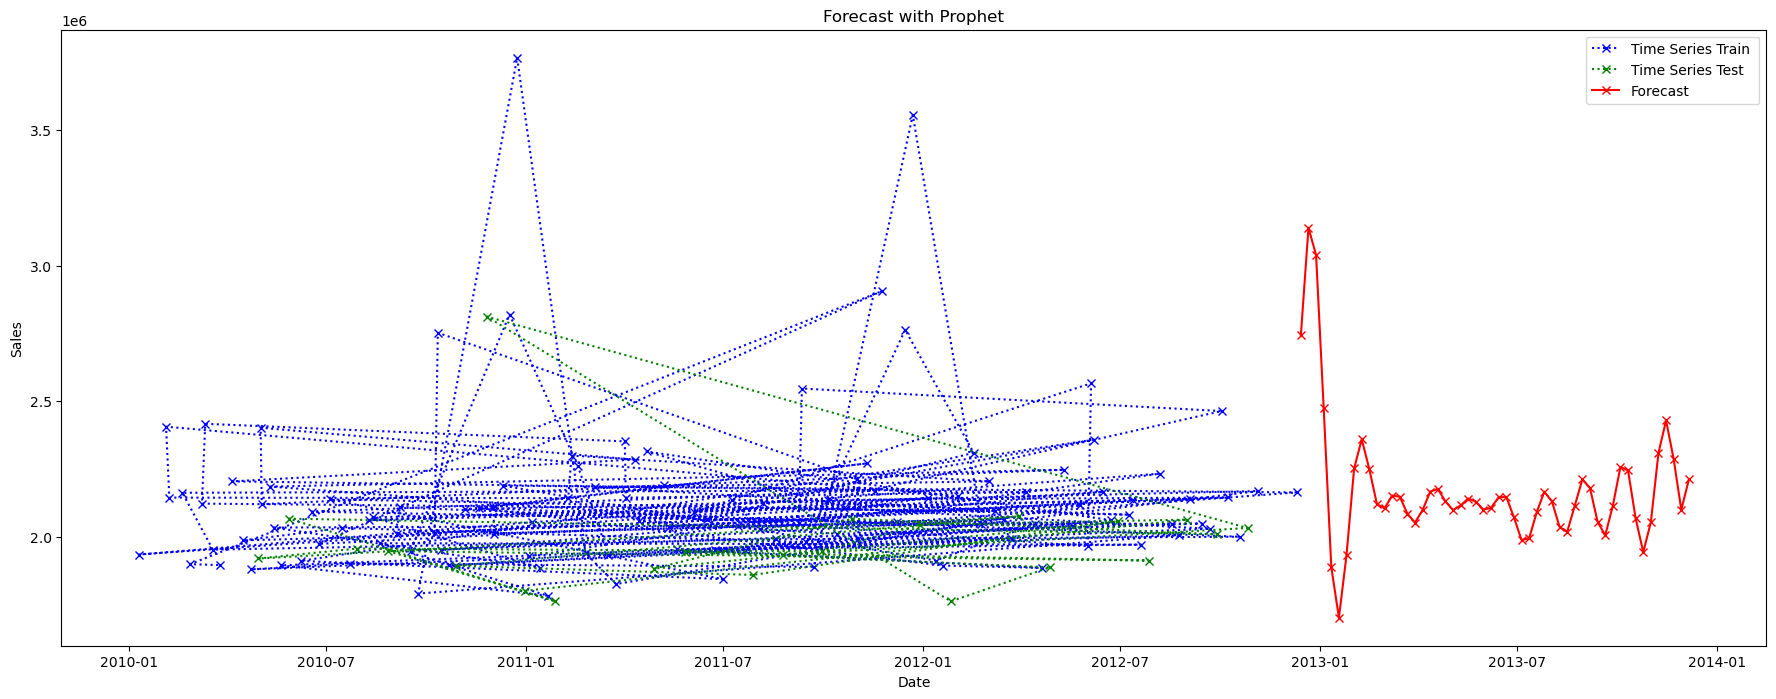

In [26]:
plt.figure(figsize=(22,8))

plt.plot(y_train['ds'], y_train['y'], 'bx:')

plt.plot(y_test['ds'], y_test['y'], 'bx:', color='green')
plt.plot(forecast["ds"][120:], forecast["yhat"][120:], "bx-", color="red")

plt.legend(['Time Series Train ','Time Series Test','Forecast'])
plt.title("Forecast with Prophet")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

In [27]:
y_pred = forecast['yhat'][120:].head(len(y_test)).values

In [28]:
mape = mean_absolute_percentage_error(y_test['y'].values, y_pred).round(4)
mae = mean_absolute_error(y_test['y'].values, y_pred).round(4)
mse = mean_squared_error(y_test['y'].values, y_pred).round(4)
r2 = r2_score(y_test['y'].values, y_pred).round(4)
print(f"MAPE: {(mape)*(100)}%")
print(f"MAE: {(mae)}")
print(f"MSE: {(mse)}")
print(f"R2: {(r2)}")

MAPE: 14.02%
MAE: 270594.62
MSE: 148715363141.7182
R2: -2.7224


In [29]:
results = {}

for store in df['Store'].unique():
    
    store_x = df[df['Store'] == store]
    store_x = store_x[['Date','Weekly_Sales']]
    store_x = store_x.groupby('Date').sum()
    store_x.reset_index(inplace = True)
    store_x['Date'] = pd.to_datetime(store_x['Date'])
    
    store_x=store_x[['Date','Weekly_Sales']]
    store_x.columns=['ds','y']
    
    
    y_train = store_x.iloc[:120]
    y_test = store_x.iloc[120:]
    

    model = Prophet() 
    model.fit(y_train)
    
    future = model.make_future_dataframe(periods=84, freq='W-Fri')
    forecast = model.predict(future)

    y_pred = forecast['yhat'].tail(len(y_test)).values
    
    mape = (mean_absolute_percentage_error(y_test['y'].values, y_pred).round(4))*100
    mae = mean_absolute_error(y_test['y'].values, y_pred).round(4)
    
    results[store] = [mape, mae]

C:\Users\HP\AppData\Local\Temp\ipykernel_14652\1271848765.py:10: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

19:13:57 - cmdstanpy - INFO - Chain [1] start processing
19:13:57 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Temp\ipykernel_14652\1271848765.py:10: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

19:13:57 - cmdstanpy - INFO - Chain [1] start processing
19:13:57 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Temp\ipykernel_14652\1271848765.py:10: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

19:

In [30]:
results = pd.DataFrame(results)
results = results.transpose()
results.reset_index(inplace=True)
results.columns = ['Store', 'MAPE', 'MAE']
results

Store   MAPE          MAE
0       1  13.21  190325.3893
1       2   6.92  133695.1649
2       3  23.59   88620.3201
3       4  10.85  214804.9503
4       5  18.16   55997.3413
5       6   9.86  153650.2948
6       7  28.32  143074.0537
7       8  13.63  117571.5560
8       9  14.40   75031.3393
9      10   6.68  138570.0895
10     11  11.30  143246.7570
11     12  13.52  136210.7136
12     13  11.74  225277.7857
13     14  38.39  753050.9954
14     15  13.13   91320.4347
15     16  15.05   71104.0546
16     17  25.04  203527.4449
17     18  12.13  138849.3479
18     19   8.49  132952.6830
19     20  11.32  224161.8472
20     21  18.05  145708.8504
21     22  11.00  116647.3484
22     23  14.23  193330.8830
23     24   8.32  111577.5958
24     25   8.57   66756.2918
25     26   9.47   91479.5507
26     27  13.22  245491.4812
27     28   8.91  114043.7952
28     29  11.40   66329.3567
29     30   5.99   24601.8883
30     31   5.48   76724.1412
31     32   7.56   88708.7434
32     33  19.03   44249.6091
33     34  11.65  107945.6292
34     35  19.37  199006.5776
35     36  47.75  167860.1803
36     37   4.03   19976.3900
37     38  36.42  129961.0666
38     39  23.84  330699.6855
39     40   9.72   86345.5352
40     41  22.62  270860.1389
41     42  17.24   83824.6971
42     43   5.21   29573.5888
43     44  31.63   91779.5335
44     45   9.30   74409.4760

In [31]:
results.to_csv("prophet_results.csv", index=False)